In [1]:
from funcionalidades import backend 

In [2]:
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/12ata-r.e.-virtual-setembro-10-09-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/08/07ataa-r.e.-virtual-agosto-06-08-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/09ataa-r.e.-virtual-agosto-20-08-2020-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/10/ata-r.o.-15-10-19.pdf"
#########################################################################################################
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.soleneordinaria-05-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-19-02-19.pdf"
####url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-26-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-12-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.extraordinaria-15-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-19-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-26-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-09-04-19.pdf"
###
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-16-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-30-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-07-05-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-14-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/mae-destaque-nova-limense-16-05-2019-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-21-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-04-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-18-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/08/ata-r.o.-02-07-19.pdf"


#"Ata: ['-r.o.-25-06-19.pdf'] NumeroPaginas: 26"       
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
    
    
#"Ata: ['-r.o.-28-05-19-1.pdf'] NumeroPaginas: 28"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"


#"Ata: ['-r.o.-23-04-19.pdf'] NumeroPaginas: 26"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf" 
    
    
#"Ata: ['-r.o.-11-06-19.pdf'] NumeroPaginas: 1"
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
    
#"Ata: ['-r.o.-02-04-19.pdf'] NumeroPaginas: 1"
#url= "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"    
    
#"Ata: ['-r.o.-12-02-19.pdf'] NumeroPaginas: 1
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
    


#### Obteção de Dados

In [3]:
text = backend.extrair_texto_pdf(url)

#### Nuvem de palavras 
#### Sem filtro

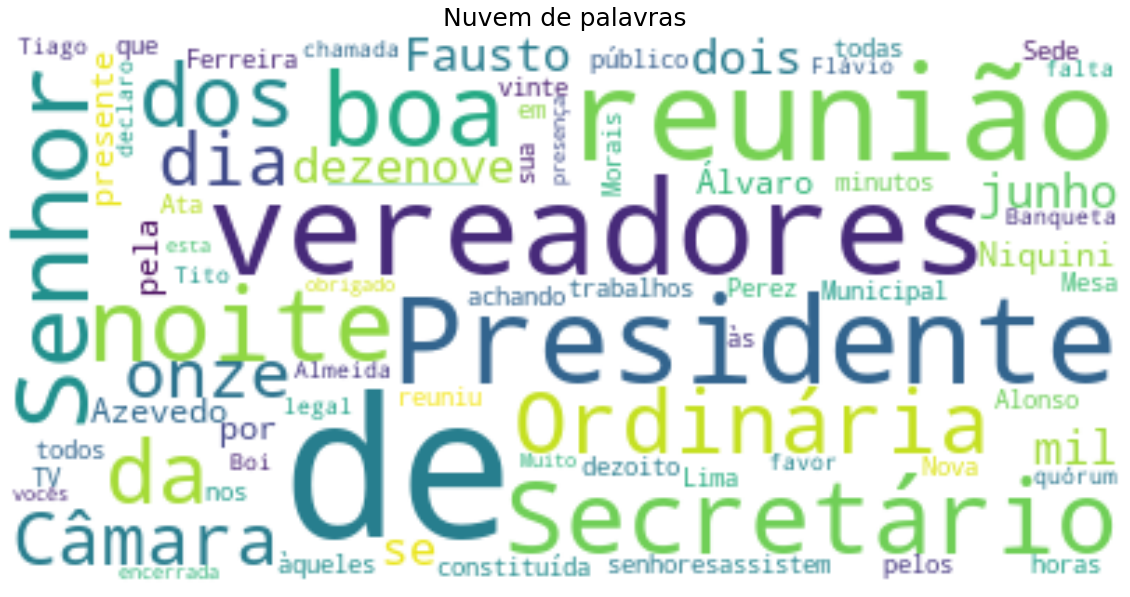

In [4]:
backend.nuvem_palavras(text,  'Nuvem de palavras')

#### Filtragem de palavras

In [5]:
resultado = backend.filtos(text)

#### Palavras mais frequentes

In [6]:
backend.palavras_frequentes(resultado)

['quórum']

#### Tabulação de dados 

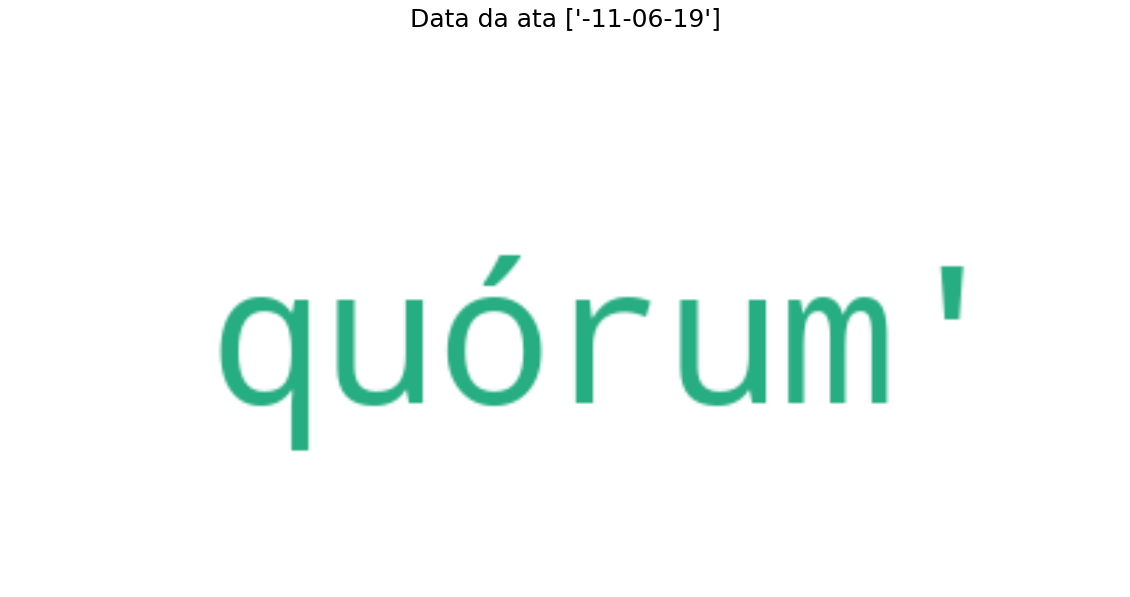

Data da reunião: ['-11-06-19']
Número de Vereadores presentes: 4 
Lista com os Vereadores Presentes: ['Fausto  Niquini', 'Flávio  de  Almeida', 'Fausto Niquini', 'Boi']
Houve Reunião: Não
Palavras mais frequêntes:['quórum']


In [8]:
backend.nuvem_palavras(resultado,  f"Data da ata {str(backend.data_reuniao(url))}")
print(f"Data da reunião: {str(backend.data_reuniao(url))}")
backend.dados_ata(text)
print(f"Palavras mais frequêntes:{backend.palavras_frequentes(resultado)}")

In [ ]:
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import json

In [ ]:
#url = 'https://www.dicionarioinformal.com.br/'

In [ ]:
#descomentar para windows
#from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
#binary = FirefoxBinary('C:\\Program Files\\Mozilla Firefox\\firefox.exe')
#driver = webdriver.Firefox(firefox_binary=binary, executable_path=r'C:\\geckodriver-v0.27.0-win64\\geckodriver.exe')

In [ ]:
options = Options()
options.headless = True
driver = webdriver.Firefox()

In [ ]:
driver.get(url)
time.sleep(10)

In [ ]:
significados = []
for i  in pesquisar:
    driver.refresh()
    time.sleep(5)
    driver.get(url)
    time.sleep(5)
    campo_exercicio = driver.find_element_by_id("buscar_input")
    campo_exercicio.send_keys(i)
    time.sleep(5)
    comfirmar = driver.find_element_by_id('buscar_input')
    comfirmar.send_keys(u'\ue007')
    time.sleep(5)
    definicao = driver.find_element_by_xpath("//div[@class='card-body card-padding card-body-di']")
    conteudo_definicao = definicao.get_attribute('outerHTML')
    sopa = BeautifulSoup(conteudo_definicao, 'html.parser')
    p = sopa.find(name='p')
    significados.append(i)
    significados.append(p)
    time.sleep(5)

In [ ]:
significados

In [ ]:
driver.quit()